## Identification.

• Giovana Morais - 

• Lucas Batista Gabriel - 7656147



## Name of the dataset
Dataset: City Cellular Traffic Map
URL: https://github.com/caesar0301/city-cellular-traffic-map

## Abstract
bla bla bla

## Questions to the dataset
Question 1: 

Question 2: 

Question 3: 

Question 4:

Question 5:

Question 6:


## EDA
Present your EDA strategy:


In [1]:
import pandas as pd
from statistics import mean, median
import matplotlib.pyplot as plt
from matplotlib import rcParams
import geopandas
%matplotlib inline
rcParams['figure.figsize'] = 15, 10

### Celular Traffic

In [9]:
cellular_trafic_data = pd.read_csv('traceset/cellular_traffic.csv', delimiter = ',', decimal='.')

In [10]:
cellular_trafic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625680 entries, 0 to 1625679
Data columns (total 5 columns):
bs           1625680 non-null int64
time_hour    1625680 non-null int64
users        1625680 non-null int64
packets      1625680 non-null int64
bytes        1625680 non-null float64
dtypes: float64(1), int64(4)
memory usage: 62.0 MB


In [11]:
cellular_trafic_data.head()

,bs,time_hour,users,packets,bytes
0,1,1345305600,1,3,3473.0
1,2,1345305600,1,12,2496.0
2,3,1345305600,1,18,5616.0
3,4,1345305600,1,113,156068.0
4,5,1345305600,1,19,5928.0


In [18]:
cellular_trafic_data.tail()

,bs,time_hour,users,packets,bytes
1625675,7993,1345993200,159,29125,41199852.0
1625676,7995,1345993200,168,24182,36864079.0
1625677,7997,1345993200,190,33781,78226635.0
1625678,7998,1345993200,198,34345,228122304.0
1625679,7999,1345993200,237,36725,67846985.0


In [24]:
cellular_trafic_data.describe()

,bs,time_hour,users,packets,bytes
count,1.625680e+06,1.625680e+06,1.625680e+06,1.625680e+06,1.625680e+06
mean,5.372162e+03,1.345643e+09,1.377170e+01,1.724474e+03,8.223766e+06
std,3.060182e+03,1.952034e+05,2.034654e+01,4.600335e+03,1.902086e+08
min,1.000000e+00,1.345306e+09,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.938000e+03,1.345475e+09,2.000000e+00,7.200000e+01,8.074000e+04
50%,5.276000e+03,1.345637e+09,6.000000e+00,4.430000e+02,5.738290e+05
75%,7.528000e+03,1.345806e+09,1.600000e+01,1.695000e+03,2.553905e+06
max,1.326900e+04,1.345993e+09,4.130000e+02,7.945850e+05,1.148665e+11


### Topology

In [12]:
topology_data = pd.read_csv('traceset/topology.csv', delimiter = ',', decimal='.')

In [13]:
topology_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13269 entries, 0 to 13268
Data columns (total 3 columns):
bs     13269 non-null int64
lon    13269 non-null float64
lat    13269 non-null float64
dtypes: float64(2), int64(1)
memory usage: 311.1 KB


In [14]:
topology_data.head()

,bs,lon,lat
0,1,111.247626,13.161971
1,2,111.209676,13.288072
2,3,111.210788,13.295707
3,4,111.203125,13.290818
4,5,111.215505,13.281345


In [15]:
topology_data.tail()

,bs,lon,lat
13264,13265,111.063918,13.198752
13265,13266,111.066573,13.039694
13266,13267,111.065121,13.107543
13267,13268,111.196631,13.205329
13268,13269,111.036413,13.168402


In [16]:
topology_data.describe()

,bs,lon,lat
count,13269.000000,13269.000000,13269.000000
mean,6635.000000,111.083635,13.147439
std,3830.574696,0.063283,0.063965
min,1.000000,110.951698,13.004320
25%,3318.000000,111.043553,13.111423
50%,6635.000000,111.075527,13.148746
75%,9952.000000,111.111813,13.185112
max,13269.000000,111.248901,13.353194


In [19]:
df = geopandas.read_file(geopandas.datasets.get_path('nybb'))


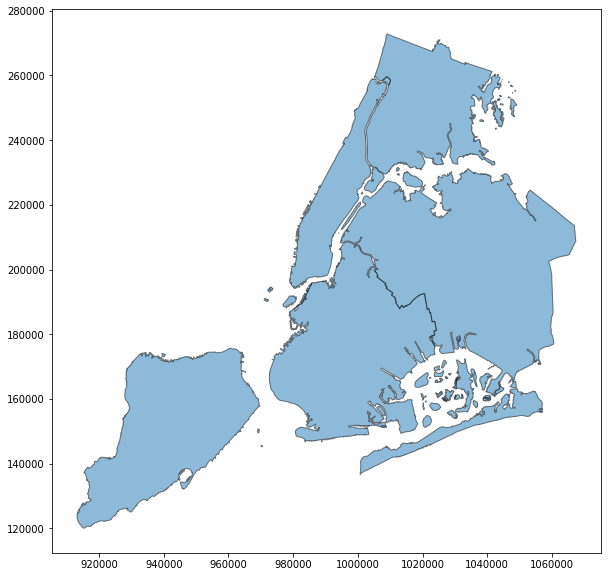

In [6]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
